Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Anuj Gupta"
ID = "st122561"

---

# Lab 03: Logistic Regression

Thus far, the problems we've encountered have been *regression* problems, in which the target $y \in \mathbb{R}$.

Today we'll start experimenting with *classification* problems, beginning with *binary* classification problems, in which the target $y \in \{ 0, 1 \}$.

## Background

The simplest approach to classification, applicable when the input feature vector $\mathbf{x} \in \mathbb{R}^n$, is a simple generalization of what we
do in linear regression. Recall that in linear regression, we assume that the target is drawn from a Gaussian distribution whose mean is a linear function
of $\mathbf{x}$:

$$ y \sim {\cal N}(\theta^\top \mathbf{x}, \sigma^2) $$

In logistic regression, similarly, we'll assume that the target is drawn from a Bernoulli distribution with parameter $p$ being the probability of
class 1:

$$ y \sim \text{Bernoulli}(p) $$

That's fine, but how do we model the parameter $p$? How is it related to $\mathbf{x}$?

In linear regression, we assume that the mean of the Gaussian is $\theta^\top \mathbf{x}$, i.e., a linear function of $\mathbf{x}$.

In logistic regression, we'll assume that $p$ is a "squashed" linear function of $\mathbf{x}$, i.e.,

$$ p = \text{sigmoid}(\theta^\top \mathbf{x}) = g(\theta^\top \mathbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}. $$

Later, when we introduce generalized linear models, we'll see why $p$ should take this form. For now, though, we can simply note that the selection makes
sense. Since $p$ is a discrete probability, $p$ is bounded by $0 \le p \le 1$. The sigmoid function $g(\cdot)$ conveniently obeys these bounds:


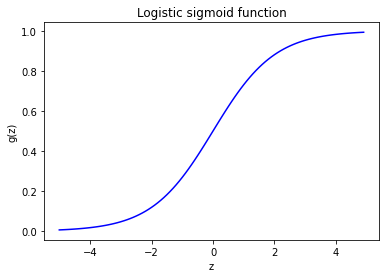

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(z): #sigmoid 
    return 1 / (1 + np.exp( -z ))

z = np.arange(-5, 5, 0.1)
plt.plot(z, f(z), 'b-')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Logistic sigmoid function')
plt.show()

We see that the sigmoid approaches 0 as its input approaches $-\infty$ and approaches 1 as its input approaches $+\infty$. If its input is 0, its value is 0.5.

Again, this choice of function may seem strange at this point, but bear with it! We'll derive this function from a more general principle, the generalized
linear model, later.

OK then, we now understand that for logistic regression, the assumptions are:

1. The *data* are pairs $(\textbf{x}, y) \in \mathbb{R}^n \times \{ 0, 1 \}$.
1. The *hypothesis function* is $h_\theta(\textbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}$.

What else do we need... ? A cost function and an algorithm for minimizing that cost function!

## Cost function for logistic regression

You can refer to the lecture notes to see the derivation, but for this lab, let's just skip to the chase.
With the hypothesis $h_\theta(\mathbf{x})$ chosen as above, the log likelihood function $\ell(\theta)$ can be derived as
$$ \ell(\theta) = \log {\cal L}(\theta) =  \sum_{i=1}^{m}y^{(i)}\log(h_{\theta}(\mathbf{x}^{(i)})) + (1 - y^{(i)})\log(1 - (h_{\theta}(\mathbf{x}^{(i)})) .$$

Negating the log likelihood function to obtain a loss function, we have

$$ J(\theta) = - \sum_{i=1}^m y^{(i)}\log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1-h_\theta(\textbf{x}^{(i)})) .$$

There is no closed-form solution to this problem like there is in linear regression, so we have to use gradient descent to find $\theta$ minimizing $J(\theta)$.
Luckily, the function *is* convex in $\theta$ so there is just a single global minimum, and gradient descent is guaranteed to get us there eventually if we take
the right step size.

The *stochastic* gradient of $J$, for a single observed pair $(\mathbf{x}, y)$, turns out to be (see lecture notes)

$$\nabla_J(\theta) = (h_\theta(\mathbf{x}) - y)\mathbf{x} .$$

Give some thought as to whether following this gradient to increase the loss $J$ would make a worse classifier, and vice versa!

Finally, we obtain the update rule for the $j$th iteration selecting training pattern $i$:

$$ \theta^{(j+1)} \leftarrow \theta^{(j)} + \alpha(y^{(i)} - h_\theta(\textbf{x}^{(i)}))\textbf{x}^{(i)} .$$ 

Note that we can perform *batch gradient descent* simply by summing the single-pair gradient over the entire training set before taking a step,
or *mini-batch gradient descent* by summing over a small subset of the data.

## Example dataset 1: student admissions data

This example is from Andrew Ng's machine learning course on Coursera.

The data contain students' scores for two standardized tests and an admission decision (0 or 1).


In [3]:

# Load student admissions data. The data file does not contain headers,
# so we use hard coded indices for exam 1, exam2, and the admission decision.

data = np.loadtxt('ex2data1.txt',delimiter = ',')

exam1_data = data[:,0]
exam2_data = data[:,1]
X = np.array([exam1_data, exam2_data]).T
y = data[:,2]

# Output some sample data

print('Exam scores', X[0:5,:])
print('-----------------------------')
print('Admission decision', y[0:5])

Exam scores [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
-----------------------------
Admission decision [0. 0. 0. 1. 1.]


Let's plot the data...

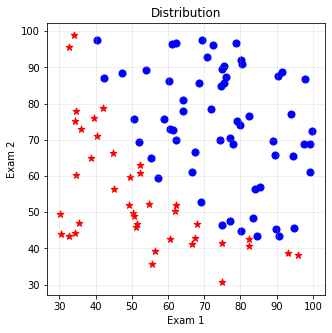

In [4]:
# Plot the data

idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

fig1 = plt.figure(figsize=(5, 5)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Distribution')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(exam1_data[idx_0], exam2_data[idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(exam1_data[idx_1], exam2_data[idx_1], s=50, c='b', marker='o', label='Admitted')
plt.show()


Let's see if we can find good values for $\theta$ without normalizing the data.
We will definitely want to split the data into train and test, however...

In [5]:
import random

# As usual, we fix the seed to eliminate random differences between different runs

random.seed(12)

# Partion data into training and test datasets

m, n = X.shape
XX = np.insert(X, 0, 1, axis=1)
y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

### Important functions needed later

Let's put all of our important functions here...

In [6]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad


### Initialize theta

In any iterative algorithm, we need an initial guess. Here we'll just use zeros for all parameters.

In [7]:
# Initialize our parameters, and use them to make some predictions

theta_initial = np.zeros((n+1, 1))

print('Initial theta:', theta_initial)
print('Initial predictions:', h(XX, theta_initial)[0:5,:])
print('Targets:', y[0:5,:])


Initial theta: [[0.]
 [0.]
 [0.]]
Initial predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
Targets: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


### Training function

Here's a function to do batch training for `num_iters` iterations.

In [8]:
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

### Do the training

Here we run the training function for a million batches!

In [9]:
# Train for 1000000 iterations on full training set

alpha = .0005
num_iters = 1000000
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[-11.29380461]
 [  0.10678604]
 [  0.07994591]]
Cost with optimized theta: 0.24972975869900035


### Plot the loss curve

Next let's plot the loss curve (loss as a function of iteration).

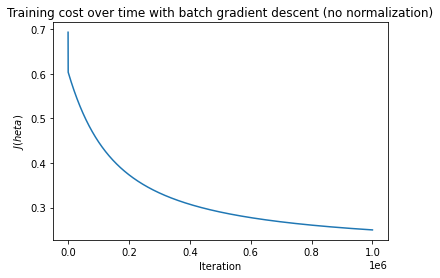

In [10]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

### In-lab exercise from Example 1 (Total 35 points)

That took a long time, right?

We'll see if we can do better. We will try the following:

1. Try increasing the learning rate $\alpha$ and starting with a better initial $\theta$. How much does it help?
   - Try at least 2 learning rate $\alpha$ with 2 difference $\theta$ (4 experiments)
   - Do not forget to plot the loss curve to compare your results

2. Better yet, try *normalizing the data* and see if the training converges better. How did it go? 
   - Be sure to plot loss curves to compare the results with unnormalized and normalized data.

3. Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.

Do this work in the following steps.


### Exercise 1.1 (5 points)

Fill in two different values for $\alpha$ and $\theta$.

Use variable names `alpha1`, `alpha2`, `theta_initial1`, and `theta_initial2`.

In [11]:
# grade task: change 'None' value to number(s) or function
# YOUR CODE HERE

# declare your alphas
alpha1 = 0.005
alpha2 = 0.05

# initialize thetas as you want
theta_initial1 = np.zeros((n+1, 1))
theta_initial2 = np.ones((n+1, 1))

# define your num iterations
num_iters = 300000

In [12]:
alpha_list = [alpha1, alpha2]
print('alpha 1:', alpha1)
print('alpha 2:', alpha2)

theta_initial_list = [theta_initial1, theta_initial2]
print('theta 1:', theta_initial_list[0])
print('theta 2:', theta_initial_list[1])

print('Use num iterations:', num_iters)

# Test function: Do not remove
assert alpha_list[0] is not None and alpha_list[1] is not None, "Alpha has not been filled"
chk1 = isinstance(alpha_list[0], (int, float))
chk2 = isinstance(alpha_list[1], (int, float))
assert chk1 and chk2, "Alpha must be number"
assert theta_initial_list[0] is not None and theta_initial_list[1] is not None, "initialized theta has not been filled"
chk1 = isinstance(theta_initial_list[0], (list,np.ndarray))
chk2 = isinstance(theta_initial_list[1], (list,np.ndarray))
assert chk1 and chk2, "Theta must be list"
chk1 = ((n+1, 1) == theta_initial_list[0].shape)
chk2 = ((n+1, 1) == theta_initial_list[1].shape)
assert chk1 and chk2, "Theta size are incorrect"
assert num_iters is not None and isinstance(num_iters, int), "num_iters must be integer"
print("success!")
# End Test function

alpha 1: 0.005
alpha 2: 0.05
theta 1: [[0.]
 [0.]
 [0.]]
theta 2: [[1.]
 [1.]
 [1.]]
Use num iterations: 300000
success!


### Exercise 1.2 (5 points)

Fill in the code required to train your model on a particular $\alpha$ and $\theta$:

In [13]:
# grade task: change 'None, None' value to number(s) or function
j_history_list = []
theta_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        theta_i, j_history_i = train(X_train, y_train, theta_initial, alpha, num_iters)
        j_history_list.append(j_history_i)
        theta_list.append(theta_i)
        print("Optimized theta for ",alpha, theta_i)
        print("Optimized cost for ",alpha, j_history_i[-1])

C:\Users\anujg\AppData\Local\Temp/ipykernel_4784/2314104836.py:12: RuntimeWarning: divide by zero encountered in log
  error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
C:\Users\anujg\AppData\Local\Temp/ipykernel_4784/2314104836.py:12: RuntimeWarning: invalid value encountered in multiply
  error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))


Optimized theta for  0.005 [[-28.07782489]
 [  0.23863477]
 [  0.19171729]]
Optimized cost for  0.005 0.3059507240834383
Optimized theta for  0.005 [[-28.06457908]
 [  0.23846152]
 [  0.19150581]]
Optimized cost for  0.005 0.30710959564023005
Optimized theta for  0.05 [[-277.94103025]
 [   2.61076926]
 [   2.30913325]]
Optimized cost for  0.05 nan
Optimized theta for  0.05 [[-277.76658829]
 [   2.1708018 ]
 [   1.81871002]]
Optimized cost for  0.05 nan


In [14]:
# Test function: Do not remove
assert theta_list[0] is not None and j_history_list[0] is not None, "No values in theta_list or j_history_list"
chk1 = isinstance(theta_list[0], (list,np.ndarray))
chk2 = isinstance(j_history_list[0][0], (int, float))
assert chk1 and chk2, "Wrong type in theta_list or j_history_list"
print("success!")
# End Test function

success!


### Exercise 1.3 (10 points)

Write code to plot loss curves for each of the sequences in `j_history_list` from the previous exercise:

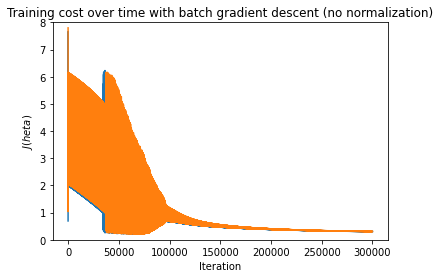

In [15]:
for j_history in j_history_list:
    plt.plot(j_history)

plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.ylim([0,8])
plt.show()

### Exercise 1.4 (10 points)

- Repeat your training, but **normalize** your data before training
- Compare the results between normalized data and unnormalized data

In [16]:
#Normalization of the dataset 
data_norm = (data-np.mean(data, axis = 0))/np.std(data, axis = 0)
exam1_dat = data_norm[:,0]
exam2_dat = data_norm[:,1]
X1 = np.array([exam1_dat, exam2_dat]).T
y1 = data_norm[:,2]

In [17]:
import random

# Partion data into training and test datasets

m, n = X1.shape
XX = np.insert(X1, 0, 1, axis=1)
y1 = y1.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];
 
theta_initial = np.ones((n+1, 1))
#theta_initial = np.ones((n+1, 1))
theta_initial


array([[1.],
       [1.],
       [1.]])

In [18]:
print('Initial theta:', theta_initial)
print('Initial predictions:', h(XX, theta_initial)[0:5,:])

Initial theta: [[1.]
 [1.]
 [1.]]
Initial predictions: [[0.50902239]
 [0.11569987]
 [0.45568027]
 [0.85866756]
 [0.89888587]]


In [19]:
# grade task: change 'None, None' value to number(s) or function
num_iters = 50000
j_history_list = []
theta_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        theta_i, j_history_i = train(X_train, y_train, theta_initial, alpha, num_iters)
        j_history_list.append(j_history_i)
        theta_list.append(theta_i)
#         print("Optimized theta for ",alpha, theta_i)
#         print("Optimized cost for ",alpha, j_history_i[-1])

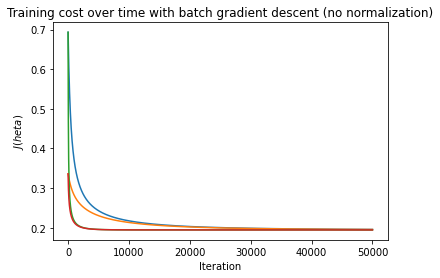

In [20]:
for j_history in j_history_list:
    plt.plot(j_history)

plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
# plt.ylim([0,8])
plt.show()

### Exercise 1.5 (5 points)

Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.

Firstly, normalizing the data caused the cost function to converge much faster than without normalization. Without, it takes upwards of 200,000 iterations to reach convergence. With it, the cost function takes about 15,000 iterations to converge. The initial theta and learning rate causes some variance at the start of the iteration process, but in the end, any initial theta/learning rate will converge to the same point after a certain number of iterations. Larger values of alpha lead to some NAN values too which can result in plotting errors.

### The logistic regression decision boundary

Note that when $\theta^\top \textbf{x} = 0$, we have $h_\theta(\textbf{x}) = 0.5$. That is, we are
equally unsure as to whether $\textbf{x}$ belongs to class 0 or class 1. The contour at which
$h_\theta(\textbf{x}) = 0.5$ is called the classifier's *decision boundary*.

We know that in the plane, the equation $$ax+by+c=0$$ is the general form of a 2D line. In our case, we have
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$ as our decision boundary, but clearly, this is just a 2D line
in the plane. So when we plot $x_1$ against $x_2$, it is easy to plot the boundary line.

In [21]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

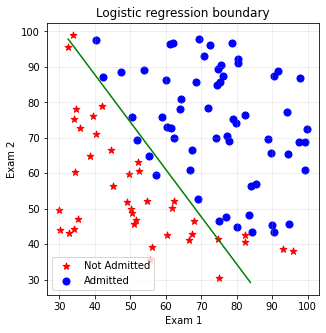

In [22]:
fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='b', marker='o', label='Admitted')
point_1, point_2 = boundary_points(X, theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()

In [23]:
alpha1 = 0.005
alpha2 = 0.05

# initialize thetas as you want
theta_initial1 = np.zeros((n+1, 1))
theta_initial2 = np.ones((n+1, 1))

# define your num iterations
num_iters = 1000000


You may have to adjust the above code to make it work with normalized data.

### Test set performance

Now let's apply the learned classifier to the test data we reserved in the beginning:


In [24]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

In [25]:
y_test_pred_soft = h(X_test, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 -0.9047, hard R^2 -0.9048, accuracy 0.53


For classification, accuracy is probably the more useful measure of goodness of fit.

## Example 2: Loan prediction dataset

Let's take another example dataset and see what we can do with it.

This dataset is from [Kaggle](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset).

The data concern loan applications. It has 12 independent variables, including 5 categorical variables. The dependent variable is the decision "Yes" or "No" for extending a loan to an individual who applied.

One thing we will have to do is to clean the data, by filling in missing values and converting categorical data to reals.
We will use the Python libraries pandas and sklearn to help with the data cleaning and preparation.

### Read the data and take a look at it

In [26]:
# Import Pandas. You may need to run "pip3 install pandas" at the console if it's not already installed

import pandas as pd

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)


Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [27]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


### Handle missing values

We can see from the above table that the `Married` column has 3 missing values in the training dataset and 0 missing values in the test dataset.
Let's take a look at the distribution over the datasets then fill in the missing values in approximately the same ratio.

You may be interested to look at the [documentation of the Pandas `fillna()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). It's great!

In [28]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Now the number of examples missing the `Married` attribute is 0.

Let's complete the data processing based on examples given and logistic regression model on training dataset. Then we'll get the model's accuracy (goodness of fit) on the test dataset.

Here is another example of filling in missing values for the `Dependents` (number of children and other dependents)
attribute. We see that categorical values are all numeric except one value "3+"
Let's create a new category value "4" for "3+" and ensure that all the data is numeric:

In [29]:

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)

data_train['Dependents'].replace('0', 0, inplace = True)
data_test['Dependents'].replace('0', 0, inplace = True)

data_train['Dependents'].replace('1', 1, inplace = True)
data_test['Dependents'].replace('1', 1, inplace = True)

data_train['Dependents'].replace('2', 2, inplace = True)
data_test['Dependents'].replace('2', 2, inplace = True)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


Once missing values are filled in, you'll want to convert strings to numbers.

Finally, here's an example of replacing missing values for a numeric attribute. Typically, we would use the mean of the attribute over the training set. 

In [30]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


In [31]:
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


## Take-home exercise (65 points)

Using the data from Example 2 above, finish the data cleaning and
preparation. Build a logistic regression model based on the
cleaned dataset and report the accuracy on the test and training sets.

- Set up $\mathbf{x}$ and $y$ data (10 points)
- Train a logistic regression model and return the values of $\theta$ and $J$ you obtained. Find the best $\alpha$ you can; you may find it best to normalize before training. (30 points)
- Using the best model parameters $\theta$ you can find, run on the test set and get the model's accuracy. (10 points)
- Summarize what you did to find the best results in this take home exercise. (15 points)

In [32]:
print(data_train['Gender'].value_counts())

gender = data_train['Gender'].value_counts()
print('Elements in Gender variable', gender.shape)
print('Married ratio ', gender[0]/sum(gender.values))

def fill_gender(data, fill_male, fill_female):
    data['Gender'].fillna('Male', inplace = True, limit = fill_male)
    data['Gender'].fillna('Female', inplace = True, limit = fill_female)
    
fill_male = round(data_train['Gender'].isnull().sum()*gender[0]/sum(gender.values))
fill_female = round(data_train['Gender'].isnull().sum()*gender[1]/sum(gender.values))
print(fill_male, fill_female)
    
fill_gender(data_train,fill_male,fill_female)
print(data_train['Gender'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Male      489
Female    112
Name: Gender, dtype: int64
Elements in Gender variable (2,)
Married ratio  0.8136439267886856
11 2
Male      500
Female    114
Name: Gender, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [33]:
print(data_test['Gender'].value_counts())

gender = data_test['Gender'].value_counts()
print('Elements in Gender variable', gender.shape)
print('Married ratio ', gender[0]/sum(gender.values))

fill_male = round(data_test['Gender'].isnull().sum()*gender[0]/sum(gender.values))
fill_female = round(data_test['Gender'].isnull().sum()*gender[1]/sum(gender.values))
print(fill_male, fill_female)

fill_gender(data_test,fill_male,fill_female)
print(data_test['Gender'].value_counts()) 
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

Male      286
Female     70
Name: Gender, dtype: int64
Elements in Gender variable (2,)
Married ratio  0.8033707865168539
9 2
Male      295
Female     72
Name: Gender, dtype: int64
Missing values for test data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [34]:
print(data_train['Self_Employed'].value_counts())

self_employed = data_train['Self_Employed'].value_counts()
print('Elements in Self_Employed variable', self_employed.shape)
print('Self_Employed ratio ', self_employed[0]/sum(self_employed.values))

def fill_Self_Employed(data, fill_no, fill_yes):
    data['Self_Employed'].fillna('No', inplace = True, limit = fill_no)
    data['Self_Employed'].fillna('Yes', inplace = True, limit = fill_yes)
    
fill_no = round(data_train['Self_Employed'].isnull().sum()*self_employed[0]/sum(self_employed.values))
fill_yes = round(data_train['Self_Employed'].isnull().sum()*self_employed[1]/sum(self_employed.values))
print(fill_no, fill_yes)
    
fill_Self_Employed(data_train,fill_no,fill_yes)
print(data_train['Self_Employed'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

No     500
Yes     82
Name: Self_Employed, dtype: int64
Elements in Self_Employed variable (2,)
Self_Employed ratio  0.8591065292096219
27 5
No     527
Yes     87
Name: Self_Employed, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [35]:
print(data_test['Self_Employed'].value_counts())

self_employed = data_test['Self_Employed'].value_counts()
print('Elements in Self_Employed variable', self_employed.shape)
print('Self_Employed ratio ', self_employed[0]/sum(self_employed.values))

def fill_Self_Employed(data, fill_no, fill_yes):
    data['Self_Employed'].fillna('No', inplace = True, limit = fill_no)
    data['Self_Employed'].fillna('Yes', inplace = True, limit = fill_yes)
    
fill_no = round(data_test['Self_Employed'].isnull().sum()*self_employed[0]/sum(self_employed.values))
fill_yes = round(data_test['Self_Employed'].isnull().sum()*self_employed[1]/sum(self_employed.values))
print(fill_no, fill_yes)
    
fill_Self_Employed(data_test,fill_no,fill_yes)
print(data_test['Self_Employed'].value_counts()) 
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

No     307
Yes     37
Name: Self_Employed, dtype: int64
Elements in Self_Employed variable (2,)
Self_Employed ratio  0.8924418604651163
21 2
No     328
Yes     39
Name: Self_Employed, dtype: int64
Missing values for test data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [36]:
print(data_train['Loan_Amount_Term'].value_counts())

print('mean Loan_Amount_Term', np.mean(data_train["Loan_Amount_Term"]))

loan_amount_term_mean = np.mean(data_train["Loan_Amount_Term"])

data_train['Loan_Amount_Term'].fillna(loan_amount_term_mean, inplace=True, limit = 14)
data_test['Loan_Amount_Term'].fillna(loan_amount_term_mean, inplace=True, limit = 6)
print(data_train['Loan_Amount_Term'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print(data_test['Loan_Amount_Term'].value_counts()) 
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
mean Loan_Amount_Term 342.0
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
360.0    311
180.0     22
480.0      8
300.0      7
342.0      6
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64
Missing values for test data:
-------

In [37]:
print(data_train['Credit_History'].value_counts())

credit_history = data_train['Credit_History'].value_counts()
print('Elements in Credit_History variable', credit_history.shape)
print('Credit_History ratio ', credit_history[0]/sum(credit_history.values))

def fill_Credit_History(data, fill_1, fill_0):
    data['Credit_History'].fillna(1.0, inplace = True, limit = fill_1)
    data['Credit_History'].fillna(0.0, inplace = True, limit = fill_0)
    
fill_1 = round(data_train['Credit_History'].isnull().sum()*credit_history[0]/sum(credit_history.values))
fill_0 = round(data_train['Credit_History'].isnull().sum()*credit_history[1]/sum(credit_history.values))
print(fill_1, fill_0)
    
fill_Credit_History(data_train,fill_1,fill_0)
print(data_train['Credit_History'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

1.0    475
0.0     89
Name: Credit_History, dtype: int64
Elements in Credit_History variable (2,)
Credit_History ratio  0.15780141843971632
8 42
1.0    483
0.0    131
Name: Credit_History, dtype: int64
Missing values for train data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [38]:
print(data_test['Credit_History'].value_counts())

credit_history = data_test['Credit_History'].value_counts()
print('Elements in Credit_History variable', credit_history.shape)
print('Credit_History ratio ', credit_history[0]/sum(credit_history.values))

def fill_Credit_History(data, fill_1, fill_0):
    data['Credit_History'].fillna(1.0, inplace = True, limit = fill_1)
    data['Credit_History'].fillna(0.0, inplace = True, limit = fill_0)
    
fill_1 = round(data_test['Credit_History'].isnull().sum()*credit_history[0]/sum(credit_history.values))
fill_0 = round(data_test['Credit_History'].isnull().sum()*credit_history[1]/sum(credit_history.values))
print(fill_1, fill_0)
    
fill_Credit_History(data_test,fill_1,fill_0)
print(data_test['Credit_History'].value_counts()) 
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

1.0    279
0.0     59
Name: Credit_History, dtype: int64
Elements in Credit_History variable (2,)
Credit_History ratio  0.17455621301775148
5 24
1.0    284
0.0     83
Name: Credit_History, dtype: int64
Missing values for test data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [39]:
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [40]:
#removing first index column by making Loan_ID column the explicit index
data_train.set_index('Loan_ID', inplace=True)
data_test.set_index('Loan_ID', inplace=True)

In [41]:
# convert to numeric data
data_train['Gender'].replace('Male', 0, inplace=True)
data_train['Gender'].replace('Female', 1, inplace=True)
data_test['Gender'].replace('Male', 0, inplace=True)
data_test['Gender'].replace('Female', 1, inplace=True)

data_train['Married'].replace('No', 0, inplace=True)
data_train['Married'].replace('Yes', 1, inplace=True)
data_test['Married'].replace('No', 0, inplace=True)
data_test['Married'].replace('Yes', 1, inplace=True)

data_train['Education'].replace('Not Graduate', 0, inplace=True)
data_train['Education'].replace('Graduate', 1, inplace=True)
data_test['Education'].replace('Not Graduate', 0, inplace=True)
data_test['Education'].replace('Graduate', 1, inplace=True)

data_train['Self_Employed'].replace('No', 0, inplace=True)
data_train['Self_Employed'].replace('Yes', 1, inplace=True)
data_test['Self_Employed'].replace('No', 0, inplace=True)
data_test['Self_Employed'].replace('Yes', 1, inplace=True)

data_train['Property_Area'].replace('Urban', 0, inplace=True)
data_train['Property_Area'].replace('Semiurban', 1, inplace=True)
data_train['Property_Area'].replace('Rural', 2, inplace=True)
data_test['Property_Area'].replace('Urban', 0, inplace=True)
data_test['Property_Area'].replace('Semiurban', 1, inplace=True)
data_test['Property_Area'].replace('Rural', 2, inplace=True)

data_train['Loan_Status'].replace('Y', 1, inplace=True)
data_train['Loan_Status'].replace('N', 0, inplace=True)

In [42]:
X = data_train.iloc[:,:-1]
X = X.astype(float)
X = np.array(X)
y = data_train.iloc[:,-1]
y = y.astype(float)
y = np.array(y)

# Normalize data
X_norm = (X-np.mean(X, axis=0))/np.std(X, axis=0)

print(X_norm.shape)

(614, 11)


In [43]:
# add intercept to first column
XX = np.insert(X_norm, 0, 1, axis=1)
print(XX.shape)
print(y.shape)
y = y.reshape(-1, 1)

(614, 12)
(614,)


In [44]:
# initialize thetas
theta_initial = np.zeros((XX.shape[1],1))

In [45]:
# IMPORTANT FUNCTIONS
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0] 
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0] 
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

In [46]:
print('Initial theta:', theta_initial)
print('Initial predictions:', h(XX, theta_initial)[0:5,:])
print('Targets:', y[0:5,:])

Initial theta: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Initial predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
Targets: [[1.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [47]:
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

In [48]:
# Train for 50000 iterations with a of 0.0005

alpha = .0005
num_iters = 50000
theta, j_history = train(XX, y, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[ 0.87620217]
 [ 0.07781428]
 [ 0.29616043]
 [-0.05299582]
 [ 0.1605366 ]
 [ 0.0266606 ]
 [-0.00918113]
 [-0.10419829]
 [-0.08310182]
 [-0.05466959]
 [ 0.87839915]
 [-0.06306559]]
Cost with optimized theta: 0.52341025280948


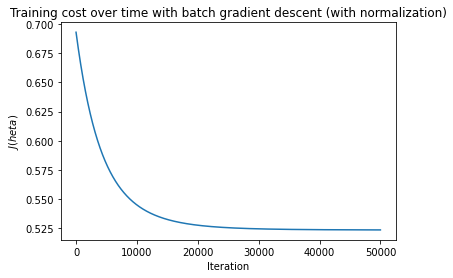

In [49]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (with normalization)")
plt.show()

In [68]:
# check training set performance because test set has no Loan Status!!
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

y_train_pred_soft = h(XX, theta)
y_train_pred_hard = (y_train_pred_soft > 0.5).astype(int)

train_rsq_soft = r_squared(y, y_train_pred_soft)
train_rsq_hard = r_squared(y, y_train_pred_hard)
train_acc = (y_train_pred_hard == y).astype(int).sum() / y.shape[0]

print('Got train set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (train_rsq_soft, train_rsq_hard, train_acc))

Got train set soft R^2 0.2029, hard R^2 -0.0609, accuracy 0.77


## To turn in

Turn in this Jupyter notebook with your solutions to he exercises and your experiment reports,
both for the in-lab exercise and the take-home exercise. Be sure you've discussed what
you learned in terms of normalization and data cleaning and the results
you obtained.


In Exercise 2 and the take-home exercise, I started by importing the Loan Prediction dataset into a Pandas dataframe. This is a very powerful way to visualize and manipulate large amounts of data using Python. Using various pandas functions, I was able to quickly identify gaps in the dataset and fill it in with appropriate data. For categorical data, the missing values were filled in by calculating each ratio of the values and filling an appropriate proportion of that value. For numeric data, the missing values were simply filled in with the mean of the rest of the data.

After this stage, each feature was converted to a numeric form by replacing the values with 0, 1, or 2, and the data was normalized as usual to reach convergence faster.

Finally, the training was performed with various alphas and changing iterations but the best result was found with an alpha of 0.0005 and 50,000 iterations. This gives a final cost of 0.52, the model converged after about 27,000 iterations. The training model was evaluated and a soft R-squared value of 0.2029 was found, hard R-squared of -0.0609 with an accuracy of 0.77.